<a href="https://colab.research.google.com/github/MarigoldJ/ygl2/blob/main/class/20210611_nlp_day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BOW (Bag of words)
1. 통계와 머신러닝을 활용한 방법
2. 인공 신경망을 활용한 방법

doc1 = 'John likes to watch movies. Mary likes movies too.'

BoW1 = {"John":1, "likes":2, "to":1, "watch":1, "movies":2, "Mary":1, "too":1}


doc2 = 'Mary also likes to watch football games.'  
BoW2 = {"Mary":1, "also":1, "likes":1, "to":1, "watch":1, "football":1, "games":1}


doc3 = 'John likes to watch movies. Mary likes movies too. Mary also likes to watch football games.'  
BoW3 = {"John":1, "likes":3, "to":2, "watch":2, "movies":2, "Mary":2, "too":1, "also":1, "football":1, "games":1};



## keras Tokenizer를 활용한 BOW

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
def print_bow(sentence):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentence)    # 단어장 생성
    bow = dict(tokenizer.word_counts)   # 각 단어와 각 단어의 빈도를 bow에 저장

    print('Bag of words :', bow)        # bow 출력
    print('단어장의 크기 :', len(tokenizer.word_counts)) # 중복되지 않는 단어의 개수

In [ ]:
sentence = ['John likes to watch movies. Mary likes movies too. Mary also likes to watch football games.']
print_bow(sentence)                     # 어떤 단어가 몇번 나왔는지 표기해줌.

Bag of words : {'john': 1, 'likes': 3, 'to': 2, 'watch': 2, 'movies': 2, 'mary': 2, 'too': 1, 'also': 1, 'football': 1, 'games': 1}
단어장의 크기 : 10


## scikit-learn CountVectorizer를 활용한 BOW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
sentence = ['John likes to watch movies. Mary likes movies too. Mary also likes to watch football games.']

vector = CountVectorizer()
print('Bag of Words :', vector.fit_transform(sentence).toarray())
print('각 단어의 인덱스 :', vector.vocabulary_)
# [1 1 1 1 3 2 2 2 1 2]에서 5번째 인덱스가 3인 것으로 봤을때,
# likes가 3번 나왔음을 알 수 있다.

print()
print('단어장의 크기 :', len(vector.vocabulary_))

Bag of Words : [[1 1 1 1 3 2 2 2 1 2]]
각 단어의 인덱스 : {'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}

단어장의 크기 : 10


# DTM (Document-Term Matrix)

## 간단한 실습

* 문서 1 : `I like dog`
* 문서 2 : `I like cat`
* 문서 3 : `I like cat I like cat`

||`cat`|`dog`|`I`|`like`|
|--|---|---|---|---|
|문서1|0|1|1|1
|문서2|1|0|1|1
|문서1|2|0|2|2

In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

In [ ]:
# 두 array의 유사도 계산
# 내적과 관련된 내용같음.
def cos_sim(A, B):
    '''
    DTM에서의 코사인 유사도
    0이상 1이하의 값을 가지며, 값이 클수록 유사도가 높음.
    '''
    return dot(A, B)/(norm(A)*norm(B))

In [ ]:
doc1 = np.array([0, 1, 1, 1])
doc2 = np.array([1, 0, 1, 1])
doc3 = np.array([2, 0, 2, 2])

print(cos_sim(doc1, doc2))
print(cos_sim(doc1, doc3))
print(cos_sim(doc2, doc3))

0.6666666666666667
0.6666666666666667
1.0000000000000002


## scikit-learn CountVectorizer를 활용한 DTM 구현

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
corpus = [
    'John likes to watch movies',
    'Mary likes movies too',
    'Mary also likes to watch football games',
]

vector = CountVectorizer()

print(vector.fit_transform(corpus).toarray())   # 코퍼스로부터 각 단어의 빈도수 기록
print(vector.vocabulary_)                       # 각 단어의 인덱스가 다음과 같이 부여됨.

[[0 0 0 1 1 0 1 1 0 1]
 [0 0 0 0 1 1 1 0 1 0]
 [1 1 1 0 1 1 0 1 0 1]]
{'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


# TF-IDF

* **모든 문서**에서 자주 등장하는 단어는 중요도가 **낮다**고 판단
* **특정 문서**에서만 자주 등장하는 단어는 중요도가 **높다**고 판단

* TF : 단어의 빈도
* IDF : 문서의 빈도의 역수

## 간단한 실습

In [ ]:
from math import log
import pandas as pd

In [ ]:
docs = [
    'John likes to watch movies and Mary likes movie too',
    'James likes to watch TV',
    'Mary also likes to watch football games'
]

vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

print('단어장의 크기 :', len(vocab))
print(vocab)
print()

N = len(docs)
print('문서의 개수 :', N)

단어장의 크기 : 14
['James', 'John', 'Mary', 'TV', 'also', 'and', 'football', 'games', 'likes', 'movie', 'movies', 'to', 'too', 'watch']

문서의 개수 : 3


In [ ]:
def tf(t, d):
    return d.count(t)

def idf(t):
    df = sum([t in doc for doc in docs])
    return log(N/(df + 1)) + 1

def tfidf(t, d):
    return tf(t, d) * idf(t)

In [ ]:
# TF 함수를 사용해서 DTM을 만들어보자
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]

    result[-1].append(tf(t,d))

tf_ = pd.DataFrame(result, columns=vocab)
tf_

,James,John,Mary,TV,also,and,football,games,likes,movie,movies,to,too,watch
0,0,1,1,0,0,1,0,0,2,2,1,2,1,1
1,1,0,0,1,0,0,0,0,1,0,0,1,0,1
2,0,0,1,0,1,0,1,1,1,0,0,1,0,1


In [ ]:
# IDF 함수를 사용
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=['IDF'])
idf_

,IDF
James,1.405465
John,1.405465
Mary,1.000000
TV,1.405465
also,1.405465
and,1.405465
football,1.405465
games,1.405465
likes,0.712318
movie,1.405465


In [ ]:
# TF-IDF 행렬 : 출력 DTM에 있는 각 단어의 TF에 각 단어의 IDF를 곱해준 값
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]

    result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns= vocab)
tfidf_

,James,John,Mary,TV,also,and,football,games,likes,movie,movies,to,too,watch
0,0.000000,1.405465,1.0,0.000000,0.000000,1.405465,0.000000,0.000000,1.424636,2.81093,1.405465,1.424636,1.405465,0.712318
1,1.405465,0.000000,0.0,1.405465,0.000000,0.000000,0.000000,0.000000,0.712318,0.00000,0.000000,0.712318,0.000000,0.712318
2,0.000000,0.000000,1.0,0.000000,1.405465,0.000000,1.405465,1.405465,0.712318,0.00000,0.000000,0.712318,0.000000,0.712318


## scikit-learn TFidVectorizer를 활용한 TF-IDF 구현

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
corpus = [
    'John likes to watch movies and Mary likes movie too',
    'James likes to watch TV',
    'Mary also likes to watch football games'
]

tfidfv = TfidfVectorizer().fit(corpus)
vocab = list(set(tfidfv.vocabulary_.keys()))
vocab.sort()

tfidf_ = pd.DataFrame(tfidfv.transform(corpus).toarray(), columns=vocab)
tfidf_

,also,and,football,games,james,john,likes,mary,movie,movies,to,too,tv,watch
0,0.000000,0.361047,0.000000,0.000000,0.000000,0.361047,0.426480,0.274586,0.361047,0.361047,0.213240,0.361047,0.000000,0.213240
1,0.000000,0.000000,0.000000,0.000000,0.572929,0.000000,0.338381,0.000000,0.000000,0.000000,0.338381,0.000000,0.572929,0.338381
2,0.464997,0.000000,0.464997,0.464997,0.000000,0.000000,0.274634,0.353642,0.000000,0.000000,0.274634,0.000000,0.000000,0.274634


# LSA

* LSA (잠재의미분석)
    * 전체 코퍼스에서 문자 속 단어들 상의 관계를 찾아내는 자연어 처리 정보검색 기술
    * 단어와 단어사이, 문서와 문서사이, 단어와 문서사이의 의미적 유사성 점수를 찾아냄
* LDA

In [ ]:
# nltk 없으면 설치
! pip install nltk

In [ ]:
import pandas as pd
import numpy as np
import urllib.request

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
path_nltk = './nltk_data'

nltk.download('punkt', download_dir=path_nltk)
nltk.download('wordnet', download_dir=path_nltk)
nltk.download('stopwords', download_dir=path_nltk)

[nltk_data] Downloading package punkt to ./nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to ./nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to ./nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
file_name = 'abcnews-data-text.csv'
url = "https://raw.githubusercontent.com/franciscadias/data/master/abcnews-date-text.csv"
urllib.request.urlretrieve(url, filename=file_name)


('abcnews-data-text.csv', <http.client.HTTPMessage at 0x7ff3614cd390>)

In [ ]:
data = pd.read_csv(file_name)
data

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
...,...,...
1082163,20170630,when is it ok to compliment a womans smile a g...
1082164,20170630,white house defends trumps tweet
1082165,20170630,winter closes in on tasmania as snow ice falls
1082166,20170630,womens world cup australia wins despite atapat...


In [ ]:
text = data[['headline_text']]
text

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers
...,...
1082163,when is it ok to compliment a womans smile a g...
1082164,white house defends trumps tweet
1082165,winter closes in on tasmania as snow ice falls
1082166,womens world cup australia wins despite atapat...


In [ ]:
text.nunique()

headline_text    1054983
dtype: int64

In [ ]:
# 중복 제거
text.drop_duplicates(inplace=True)
text.reset_index(drop=True, inplace=True)
print(len(text))

1054983


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# 데이터 정제 및 정규화
text['headline_text'] = text.apply(lambda row: nltk.word_tokenize(row['headline_text']), axis=1)
# NLTK tokenizer를 이용해서 토큰화

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# 불용어 제거
stop_words = stopwords.words('english')
text['headline_text'] = text.apply(lambda x: [word for word in x if word not in (stop_words)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
text.head()

,headline_text
0,"[aba, decides, against, community, broadcastin..."
1,"[act, fire, witnesses, must, be, aware, of, de..."
2,"[a, g, calls, for, infrastructure, protection,..."
3,"[air, nz, staff, in, aust, strike, for, pay, r..."
4,"[air, nz, strike, to, affect, australian, trav..."


In [ ]:
# 단어 정규화 과정
# 단어 정규화 : 3인칭단수 -> 1인칭, 과거형동사 -> 현재형동사 등을 수행
text['headline_text'] = text['headline_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# 전처리 : 길이가 1~2인 단어 제거
text = text['headline_text'].apply(lambda x: [word for word in x if len(word) > 2])
print(text[:5])

0    [aba, decide, against, community, broadcast, l...
1        [act, fire, witness, must, aware, defamation]
2      [call, for, infrastructure, protection, summit]
3           [air, staff, aust, strike, for, pay, rise]
4        [air, strike, affect, australian, travellers]
Name: headline_text, dtype: object


In [ ]:
# 역토큰화 (토큰화 작업을 역으로 수행)
detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(text[i])
    detokenized_doc.append(t)

train_data = detokenized_doc

In [ ]:
train_data[:5]

['aba decide against community broadcast licence',
 'act fire witness must aware defamation',
 'call for infrastructure protection summit',
 'air staff aust strike for pay rise',
 'air strike affect australian travellers']

In [ ]:
# 상위 5000개의 단어만 사용
c_vectorizer = CountVectorizer(stop_words='english', max_features=5000)
document_term_matrix = c_vectorizer.fit_transform(train_data)

In [ ]:
# DTM의 크기
print('행렬의 크기 :', document_term_matrix.shape)  # 문서의 수 X 단어 집합의 크기

행렬의 크기 : (1054983, 5000)


## scikit-learn Truncated SVD 활용

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_model.fit_transform(document_term_matrix)

array([[ 1.20419116e-02, -3.68683080e-03,  1.83022337e-02, ...,
         4.30753790e-03, -7.64936503e-04,  1.63184951e-02],
       [ 2.89552506e-02, -1.09716706e-02,  1.81809661e-02, ...,
        -6.47615399e-03, -1.33822810e-02, -8.86429693e-03],
       [ 5.04471381e-03, -2.03614821e-03,  9.82900323e-03, ...,
        -2.09076253e-03,  2.96925337e-03,  4.25601467e-03],
       ...,
       [ 2.94075940e-02,  4.31504431e-03,  2.51337980e-02, ...,
         2.87786412e-02, -1.03005775e-02,  1.69768279e-02],
       [ 6.19143434e-02, -2.55662897e-03,  1.38509482e-01, ...,
         1.12512686e+00,  6.45934057e-01, -1.74992729e-01],
       [ 7.10112598e-02,  3.24262375e-02,  3.31685415e-03, ...,
         3.00117614e-02, -8.69283954e-02, -3.15000580e-02]])

In [ ]:
print(np.shape(lsa_model.components_))

(10, 5000)


In [ ]:
terms = c_vectorizer.get_feature_names()

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print(f'Topic {idx+1}', [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])

In [ ]:
get_topics(lsa_model.components_, terms)
# LSA에 대한 결과물

Topic 1 [('police', 0.74636), ('man', 0.45361), ('charge', 0.21083), ('new', 0.14097), ('court', 0.11169)]
Topic 2 [('man', 0.694), ('charge', 0.30077), ('court', 0.16719), ('face', 0.11504), ('murder', 0.10633)]
Topic 3 [('new', 0.8361), ('plan', 0.23626), ('say', 0.1828), ('govt', 0.11166), ('council', 0.11021)]
Topic 4 [('say', 0.73828), ('plan', 0.36088), ('govt', 0.16418), ('council', 0.12815), ('urge', 0.07701)]
Topic 5 [('plan', 0.73042), ('council', 0.18168), ('govt', 0.13927), ('urge', 0.08151), ('water', 0.06589)]
Topic 6 [('govt', 0.53573), ('court', 0.28557), ('urge', 0.23716), ('fund', 0.22609), ('nsw', 0.15607)]
Topic 7 [('charge', 0.5002), ('court', 0.47719), ('face', 0.37263), ('plan', 0.11496), ('murder', 0.10626)]
Topic 8 [('win', 0.75296), ('court', 0.22249), ('kill', 0.15174), ('cup', 0.12023), ('world', 0.11592)]
Topic 9 [('charge', 0.55156), ('win', 0.47033), ('fund', 0.09031), ('nsw', 0.08789), ('water', 0.07657)]
Topic 10 [('council', 0.76468), ('kill', 0.192), 

In [ ]:
# TF-IDF 행렬 생성

# 상위 5000개의 단어만 사용
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tf_idf_matrix = tfidf_vectorizer.fit_transform(train_data)

# TF-IDF 행렬의 크기를 확인
print('행렬의 크기 :', tf_idf_matrix.shape)

행렬의 크기 : (1054983, 5000)


* scikit-learn LDA model 활용

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', random_state=777, max_iter=1)
lda_model.fit_transform(tf_idf_matrix)

array([[0.0335099 , 0.0335099 , 0.17024868, ..., 0.0335099 , 0.0335099 ,
        0.0335099 ],
       [0.03365631, 0.03365631, 0.03365631, ..., 0.03365631, 0.03365631,
        0.03365631],
       [0.0366096 , 0.0366096 , 0.0366096 , ..., 0.67051361, 0.0366096 ,
        0.0366096 ],
       ...,
       [0.12979755, 0.02914502, 0.16177346, ..., 0.02914502, 0.02914502,
        0.16623469],
       [0.02637894, 0.02637894, 0.02637894, ..., 0.02637894, 0.18724601,
        0.02637894],
       [0.03376055, 0.03376055, 0.2255442 , ..., 0.21687895, 0.03377363,
        0.14330181]])

In [ ]:
print(np.shape(lda_model.components_))

(10, 5000)


In [ ]:
# LDA의 결과 토픽과 각 단어의 비중을 출력하자
def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print(f'Topic {idx+1}', [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])

In [ ]:
get_topics(lda_model.components_, terms)

Topic 1 [('melbourne', 5298.27732), ('attack', 4785.21468), ('home', 4047.93576), ('child', 2785.02835), ('minister', 2735.5135)]
Topic 2 [('police', 4038.15248), ('year', 3924.71786), ('state', 3657.77335), ('live', 3623.00516), ('change', 3221.92696)]
Topic 3 [('australian', 7671.07822), ('say', 7631.2947), ('house', 4476.79293), ('court', 3866.93785), ('face', 3610.1616)]
Topic 4 [('charge', 5947.81694), ('adelaide', 4865.10754), ('murder', 3907.08359), ('coast', 3825.36285), ('make', 3774.07574)]
Topic 5 [('canberra', 4322.09713), ('kill', 4092.81785), ('2016', 3960.63253), ('report', 3795.79584), ('win', 3699.05526)]
Topic 6 [('government', 6342.31982), ('sydney', 4498.2295), ('north', 3707.60749), ('qld', 3226.38161), ('man', 2992.7861)]
Topic 7 [('trump', 8185.32931), ('day', 5061.70481), ('south', 4851.14463), ('perth', 4552.52097), ('school', 3967.71312)]
Topic 8 [('new', 6350.40936), ('crash', 3794.84705), ('people', 3032.58476), ('league', 2849.84991), ('price', 2761.93098)]

# nltk 실습?

## 간단한 실습

In [ ]:
! pip install nltk
! pip install gensim

In [ ]:
import nltk
nltk.download('abc')
# nltk.download('abc', download_dir='./nltk_data')
nltk.download('punkt', download_dir='./nltk_data')

[nltk_data] Downloading package abc to /root/nltk_data...
[nltk_data]   Unzipping corpora/abc.zip.
[nltk_data] Downloading package punkt to ./nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.corpus import abc
corpus = abc.sents()

print('코퍼스의 크기 :', len(corpus))

코퍼스의 크기 : 29059


In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=corpus, size=100, window=5, min_count=5, workers=4, sg=0)

In [ ]:
# 코사인 유사도가 높은 것을 찾아보자

model_result = model.wv.most_similar('man')
print(model_result)

[('woman', 0.9311332702636719), ('Bang', 0.9247120022773743), ('asteroid', 0.9183956980705261), ('skull', 0.9152942895889282), ('third', 0.912767767906189), ('rally', 0.9126423597335815), ('dinosaur', 0.9065294861793518), ('dog', 0.9039021730422974), ('clue', 0.9024403095245361), ('bought', 0.9002601504325867)]


In [ ]:
from gensim.models import KeyedVectors

model.wv.save_word2vec_format('./w2v')                      # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format('./w2v')   # 모델 로드
print('모델 load 완료!')

모델 load 완료!


In [ ]:
model_result2 = loaded_model.wv.most_similar('man')
print(model_result2)    # 모델 저장 전과 동일한 값을 출력하는 것을 확인할 수 있다.

[('woman', 0.9311332702636719), ('Bang', 0.9247120022773743), ('asteroid', 0.9183956980705261), ('skull', 0.9152942895889282), ('third', 0.912767767906189), ('rally', 0.9126423597335815), ('dinosaur', 0.9065294861793518), ('dog', 0.9039021730422974), ('clue', 0.9024403095245361), ('bought', 0.9002601504325867)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [ ]:
loaded_model.most_similar('overacting')     # 단어장에 없는 단어를 입력시 오류 발생

KeyError: ignored

In [ ]:
loaded_model.most_similar('memory')         # 단어장에 있는 단어

[('structures', 0.9710410237312317),
 ('infection', 0.9707732200622559),
 ('jolt', 0.97023606300354),
 ('chasing', 0.9685685634613037),
 ('lifting', 0.9682129621505737),
 ('video', 0.9672243595123291),
 ('broad', 0.9671713709831238),
 ('semen', 0.9668497443199158),
 ('polymer', 0.9659065008163452),
 ('springs', 0.9657690525054932)]

In [ ]:
loaded_model.most_similar('memorry')        # 단어장에 없는 단어

KeyError: ignored

In [ ]:
! pip install konlpy

     |████████████████████████████████| 19.4MB 1.5MB/s 
     |████████████████████████████████| 92kB 8.9MB/s 
     |████████████████████████████████| 450kB 38.0MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")


('ratings.txt', <http.client.HTTPMessage at 0x7ff3145141d0>)

In [ ]:
train_data = pd.read_table('ratings.txt')
train_data[:5]
# label=0이면 부정적 내용, label=1이면 긍정적 내용

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [ ]:
# null 값 있는지 확인
print(len(train_data))      # 리뷰 개수 출력
print(train_data.isnull().values.any())
print()
print(train_data.isnull().sum())

200000
True

id          0
document    8
label       0
dtype: int64


In [ ]:
train_data = train_data.dropna(how='any')   # null 값 드랍
print(train_data.isnull().values.any())

False


In [ ]:
# 한글 외 문자를 제거하는 정규표현식 작성
train_data['document'] = train_data['document'].str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]', '')
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [ ]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp_x = okt.morphs(sentence, stem=True)
    temp_x = [word for word in temp_x if not word in stopwords]     # 불용어 거르기
    tokenized_data.append(temp_x)

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


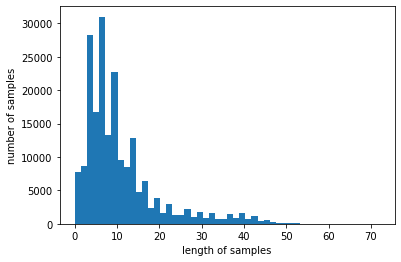

In [ ]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :', max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :', sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=tokenized_data, size=100, window=5, min_count=5, workers=4, sg=0)

In [ ]:
print(model.wv.vectors.shape)

(16477, 100)


In [ ]:
print(model.wv.most_similar('최민식'))
print(model.wv.most_similar('히어로'))

[('한석규', 0.9041584730148315), ('안성기', 0.8890461921691895), ('박중훈', 0.883015513420105), ('설경구', 0.8829434514045715), ('김수현', 0.8738288879394531), ('최민수', 0.860153317451477), ('송강호', 0.8543969392776489), ('이정재', 0.8534801602363586), ('크로우', 0.8499793410301208), ('채민서', 0.8467609882354736)]
[('느와르', 0.8601532578468323), ('무협', 0.8595666885375977), ('블록버스터', 0.8559057712554932), ('호러', 0.8514268398284912), ('슬래셔', 0.849674642086029), ('물의', 0.831580638885498), ('정통', 0.8292899131774902), ('무비', 0.8104016184806824), ('블랙', 0.8066180348396301), ('첩보', 0.7807035446166992)]


## 사전 훈련된 워드 임베딩

In [ ]:
from google.colab import files
file_uploaded = files.upload()

Saving ko.bin to ko.bin


In [ ]:
import gensim
model = gensim.models.Word2Vec.load('./ko.bin')

In [ ]:
result = model.wv.# similar '강아지'
print(result)

SyntaxError: ignored

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [ ]:
sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 'excellent work', 'supreme quality', 'bad', 'highly respectable']
y_train = [1, 0, 0, 1, 1, 0, 1] # 긍정:1 , 부정:0

In [ ]:
# 토큰화
t = Tokenizer()
t.fit_on_texts(sentences)
vocab_size = len(t.word_index) + 1

print(vocab_size)

16


In [ ]:
# 인코딩
x_encoded = t.texts_to_sequences(sentences)
print(x_encoded)

[[1, 2, 3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13], [14, 15]]


In [ ]:
max_len = max(len(l) for l in x_encoded)
print(max_len)

4


In [ ]:
# Padding
# 길이가 들쭉날죽한 것을 맞춰주기
# 모자란 내용은 0을 넣어 길이를 맞춰줌

x_train = pad_sequences(x_encoded, maxlen=max_len, padding='post')
y_train = np.array(y_train)
print(x_train)

[[ 1  2  3  4]
 [ 5  6  0  0]
 [ 7  8  0  0]
 [ 9 10  0  0]
 [11 12  0  0]
 [13  0  0  0]
 [14 15  0  0]]


In [ ]:
# 이제 모델 만들자!
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 4, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 4)              64        
_________________________________________________________________
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(x_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 1s - loss: 0.7014 - acc: 0.2857
Epoch 2/100
1/1 - 0s - loss: 0.7000 - acc: 0.4286
Epoch 3/100
1/1 - 0s - loss: 0.6987 - acc: 0.4286
Epoch 4/100
1/1 - 0s - loss: 0.6973 - acc: 0.4286
Epoch 5/100
1/1 - 0s - loss: 0.6960 - acc: 0.4286
Epoch 6/100
1/1 - 0s - loss: 0.6946 - acc: 0.4286
Epoch 7/100
1/1 - 0s - loss: 0.6933 - acc: 0.4286
Epoch 8/100
1/1 - 0s - loss: 0.6919 - acc: 0.4286
Epoch 9/100
1/1 - 0s - loss: 0.6906 - acc: 0.5714
Epoch 10/100
1/1 - 0s - loss: 0.6893 - acc: 0.5714
Epoch 11/100
1/1 - 0s - loss: 0.6879 - acc: 0.5714
Epoch 12/100
1/1 - 0s - loss: 0.6866 - acc: 0.7143
Epoch 13/100
1/1 - 0s - loss: 0.6853 - acc: 0.7143
Epoch 14/100
1/1 - 0s - loss: 0.6840 - acc: 0.7143
Epoch 15/100
1/1 - 0s - loss: 0.6826 - acc: 0.7143
Epoch 16/100
1/1 - 0s - loss: 0.6813 - acc: 0.7143
Epoch 17/100
1/1 - 0s - loss: 0.6800 - acc: 0.7143
Epoch 18/100
1/1 - 0s - loss: 0.6787 - acc: 1.0000
Epoch 19/100
1/1 - 0s - loss: 0.6773 - acc: 1.0000
Epoch 20/100
1/1 - 0s - loss: 0.6760 - a